In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [2]:
DATASET_BASE_PATH = 'dataset'

In [3]:
bird_names = ['comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']

In [4]:
def load_feature_names():
    with open(os.path.join(DATASET_BASE_PATH, 'feature_names.txt')) as f:
        return f.read().split('\n')

In [5]:
def load_annotations_for_file(bird: str, file_nr):
    data = np.load(os.path.join(DATASET_BASE_PATH, bird, f'{file_nr}.npy'))
    labels = np.load(os.path.join(DATASET_BASE_PATH, bird, f'{file_nr}.labels.npy'))
    return data, labels

In [6]:
def get_file_nrs_of_bird(bird: str):
    return [f.split('.')[0] for f in os.listdir(os.path.join(DATASET_BASE_PATH, bird))[::2]]

In [7]:
def load_annotations_for_bird(bird: str):
    file_nrs = get_file_nrs_of_bird(bird)
    data_arrays = []
    label_arrays = []
    for file_nr in file_nrs:
        data, labels = load_annotations_for_file(bird, file_nr)
        data_arrays.append(data)
        label_arrays.append(labels)
    return data_arrays, label_arrays

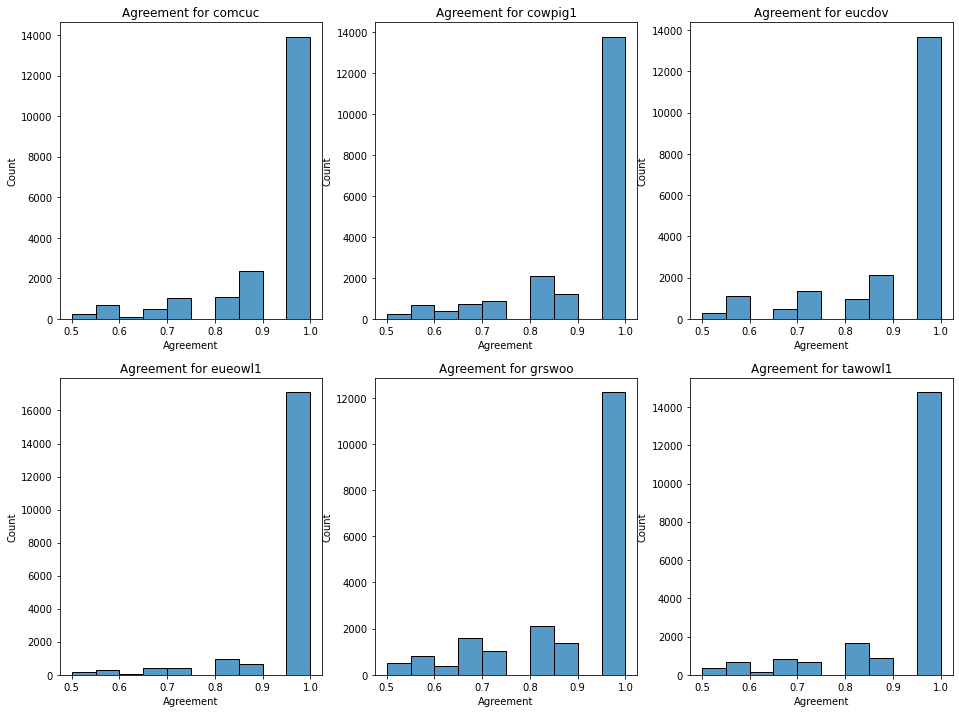

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

for i, bird_name in enumerate(bird_names):
    agreements = []
    for file_labels in load_annotations_for_bird(bird_name)[1]:
        for fragment_labels in file_labels:
            agreements.append(np.count_nonzero(fragment_labels[1:] == fragment_labels[0]) / (len(fragment_labels) - 1))
    
    ax = axs[i // 3, i % 3]
    sns.histplot(agreements, bins=10, ax=ax)
    ax.set(xlabel='Agreement', title=f'Agreement for {bird_name}')

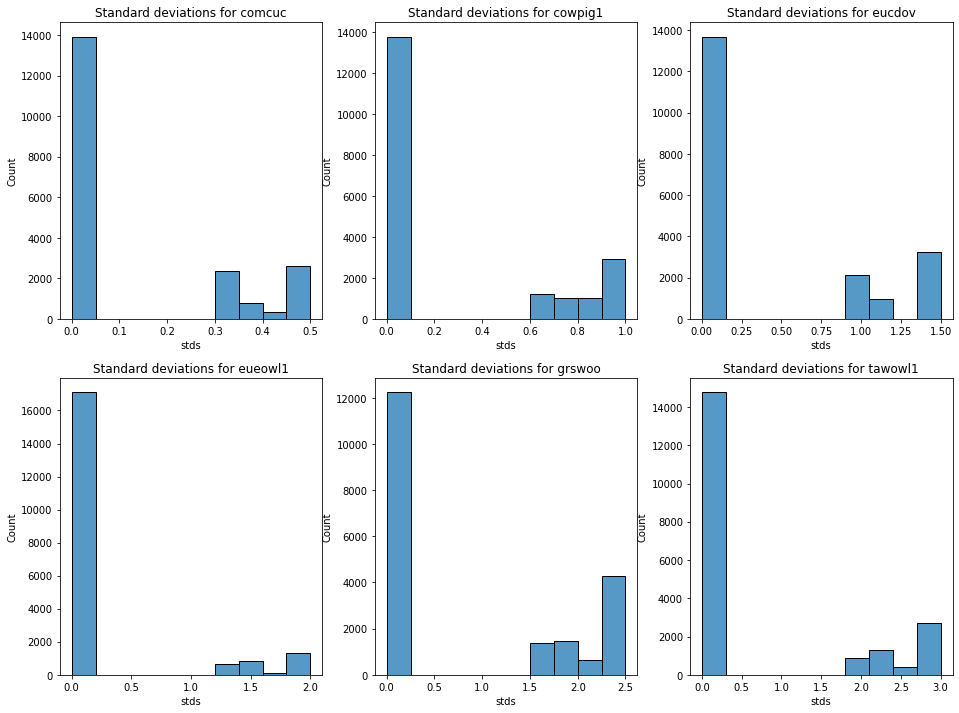

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

for i, bird_name in enumerate(bird_names):
    stds = []
    for file_labels in load_annotations_for_bird(bird_name)[1]:
        for fragment_labels in file_labels:
            stds.append(np.std(fragment_labels[1:]))
    
    ax = axs[i // 3, i % 3]
    sns.histplot(stds, bins=10, ax=ax)
    ax.set(xlabel='stds', title=f'Standard deviations for {bird_name}')

[Text(0.5, 0, 'Label (class)'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Occurences of labels')]

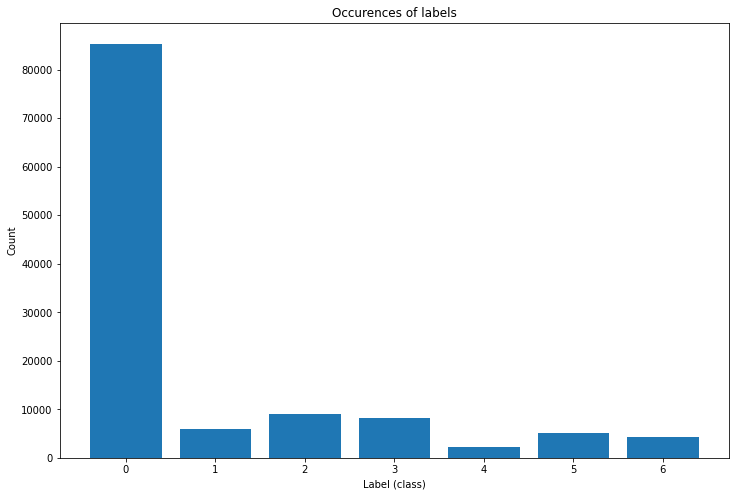

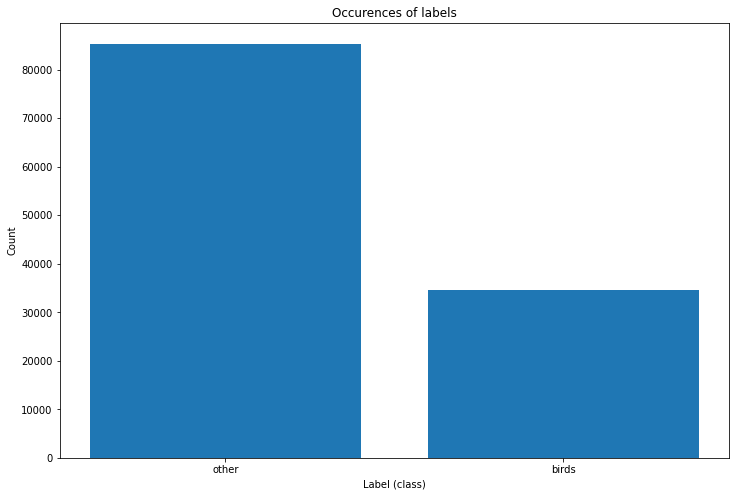

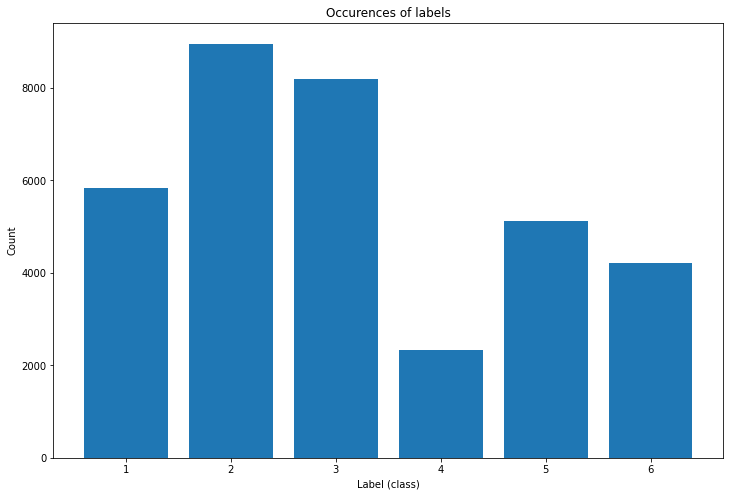

In [10]:
label_counts = collections.Counter([
    fragment_labels[0]
    for bird_name in bird_names
    for file_labels in load_annotations_for_bird(bird_name)[1]
    for fragment_labels in file_labels
])
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(label_counts.keys(), label_counts.values())
ax.set(xlabel='Label (class)', ylabel='Count', title='Occurences of labels')

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(['other', 'birds'], [list(label_counts.values())[0], sum(list(label_counts.values())[1:])])
ax.set(xlabel='Label (class)', ylabel='Count', title='Occurences of labels')

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(list(label_counts.keys())[1:], list(label_counts.values())[1:])
ax.set(xlabel='Label (class)', ylabel='Count', title='Occurences of labels')

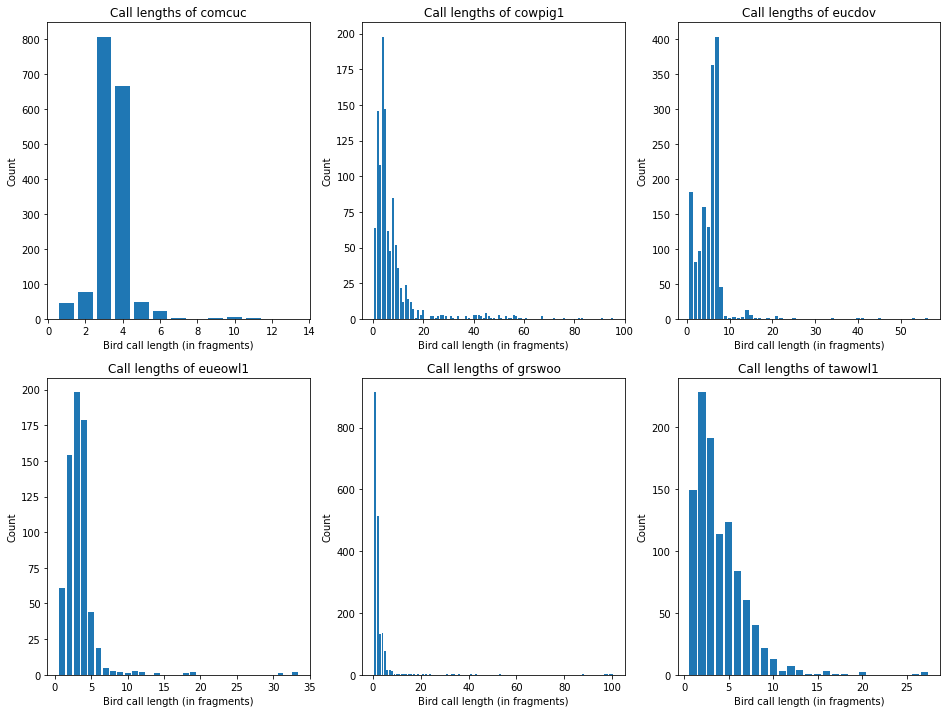

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(16, 12))

for i, bird_name in enumerate(bird_names):
    file_nrs = get_file_nrs_of_bird(bird_name)
    bird_call_lengths = []
    for file_nr in file_nrs:
        _, labels = load_annotations_for_file(bird_name, file_nr)
        file_labels = np.asarray([fragment_labels[0] for fragment_labels in labels])
        file_labels_bird_call = file_labels != 0
        # https://stackoverflow.com/a/24343375
        bird_call_lengths.extend(np.diff(np.where(np.concatenate(([file_labels_bird_call[0]],
                                     file_labels_bird_call[:-1] != file_labels_bird_call[1:],
                                     [True])))[0])[::2])
    
    bird_call_length_counts = collections.Counter(bird_call_lengths)
    ax = axs[i // 3, i % 3]
    ax.bar(bird_call_length_counts.keys(), bird_call_length_counts.values())
    ax.set(xlabel='Bird call length (in fragments)', ylabel='Count', title=f'Call lengths of {bird_name}')
    